In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


 Input variables:
   # bank client data:
   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
  
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

   5 - default: has credit in default? (categorical: "no","yes","unknown")

   6 - housing: has housing loan? (categorical: "no","yes","unknown")

   7 - loan: has personal loan? (categorical: "no","yes","unknown")

   # related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone") 

   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

   # other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

  14 - previous: number of contacts performed before this campaign and for this client (numeric)

  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

   # social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

  17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

  20 - nr.employed: number of employees - quarterly indicator (numeric)

 # Output variable (desired target):

  21 - y - has the client subscribed a term deposit? (binary: "yes","no")


In [ ]:
Data = pd.read_csv(r"bank-additional-full.csv", sep = ";")
#Y = pd.get_dummies(Data['y'], columns = ['y'], prefix = ['y'], drop_first = True)

In [ ]:
Data.drop(['nr.employed','cons.conf.idx','cons.price.idx','emp.var.rate','euribor3m'],axis=1,inplace=True)
Data.describe()

,age,duration,campaign,pdays,previous
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963
std,10.42125,259.279249,2.770014,186.910907,0.494901
min,17.00000,0.000000,1.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000


In [ ]:
a.head()

,age,duration
count,41188.00000,41188.000000
mean,40.02406,258.285010
std,10.42125,259.279249
min,17.00000,0.000000
25%,32.00000,102.000000


In [ ]:
Data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,no


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   default      41188 non-null  object
 5   housing      41188 non-null  object
 6   loan         41188 non-null  object
 7   contact      41188 non-null  object
 8   month        41188 non-null  object
 9   day_of_week  41188 non-null  object
 10  duration     41188 non-null  int64 
 11  y            41188 non-null  object
dtypes: int64(2), object(10)
memory usage: 3.8+ MB


In [ ]:
Data.columns

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = Data)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

In [ ]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(Data);

In [ ]:
Data.drop(Data.index[Data["duration"] == 0], axis = 0, inplace = True)

In [ ]:
Data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,3,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,2,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,3,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,4,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,2,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,3,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,2,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [ ]:
Data['job']      = labelencoder_X.fit_transform(Data['job']) 
Data['marital']  = labelencoder_X.fit_transform(Data['marital']) 
Data['education']= labelencoder_X.fit_transform(Data['education']) 
Data['default']  = labelencoder_X.fit_transform(Data['default']) 
Data['housing']  = labelencoder_X.fit_transform(Data['housing']) 
Data['loan']     = labelencoder_X.fit_transform(Data['loan']) 
Data['contact']  = labelencoder_X.fit_transform(Data['contact']) 
Data['month']    = labelencoder_X.fit_transform(Data['month']) 
Data['day_of_week'] = labelencoder_X.fit_transform(Data['day_of_week']) 
Data['y'] = labelencoder_X.fit_transform(Data['y'])	

In [ ]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(Data);

In [ ]:
Data["duration"]

0        3
1        2
2        3
3        2
4        3
        ..
41183    4
41184    4
41185    3
41186    4
41187    3
Name: duration, Length: 41184, dtype: int64

In [ ]:
Data['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [ ]:
Data.head()
print(Data.describe())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,3,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,2,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,2,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,3,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from statsmodels.discrete.discrete_model import Logit
from statsmodels.discrete.discrete_model import Probit
import pandas.util.testing as tm
import statsmodels.api as sm

train, test = train_test_split(Data, test_size=0.33)

In [ ]:
X = Data.drop(['y'], axis = 1)
Y = Data['y']
train_X, test_X = train.drop(['y'], axis = 1), test.drop(['y'], axis = 1)
train_y, test_y = train['y'], test['y']

In [ ]:
X = sm.add_constant(X)
model = Logit(train_y, train_X)
logit_model3 = model.fit()
print(logit_model3.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.207831
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                27593
Model:                          Logit   Df Residuals:                    27573
Method:                           MLE   Df Model:                           19
Date:                Mon, 11 Apr 2022   Pseudo R-squ.:                  0.4077
Time:                        20:15:44   Log-Likelihood:                -5734.7
converged:                       True   LL-Null:                       -9681.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0230      0.035      0.655      0.513      -0.046       0.092
job              

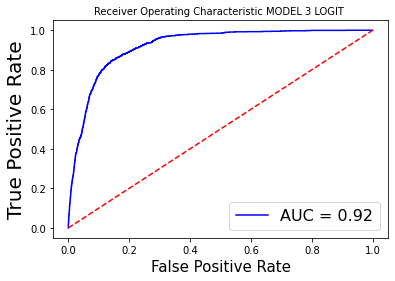

In [ ]:
pred = logit_model3.predict(test_X)
predf3logit = []
for i in pred:
  if i>= 0.3 :
    predf3logit.append(1)
  else:
     predf3logit.append(0)

fig, ax = plt.subplots()
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(test_y, pred)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic MODEL 3 LOGIT ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

In [ ]:
print(metrics.confusion_matrix(test_y, predf3logit))
print("Sensitivity = ", metrics.recall_score(test_y, predf3logit, pos_label=1))
print("Specificity = ", metrics.recall_score(test_y, predf3logit, pos_label=0))
print("Accuracy = ", metrics.accuracy_score(test_y, predf3logit))

[[11275   769]
 [  578   969]]
Sensitivity =  0.6263736263736264
Specificity =  0.9361507804716042
Accuracy =  0.9008902950481936


In [ ]:
X = sm.add_constant(X)
model = Probit(train_y, train_X)
probit_model3 = model.fit()
print(probit_model3.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.205990
         Iterations 8
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                27593
Model:                         Probit   Df Residuals:                    27573
Method:                           MLE   Df Model:                           19
Date:                Mon, 11 Apr 2022   Pseudo R-squ.:                  0.4129
Time:                        20:17:06   Log-Likelihood:                -5683.9
converged:                       True   LL-Null:                       -9681.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0165      0.019      0.867      0.386      -0.021       0.054
job              

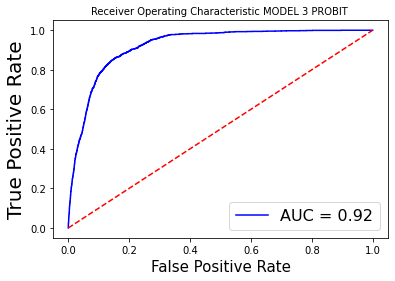

In [ ]:
pred = probit_model3.predict(test_X)
predf3probit = []
for i in pred:
  if i>= 0.3 :
    predf3probit.append(1)
  else:
     predf3probit.append(0)

fig, ax = plt.subplots()
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(test_y, pred)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic MODEL 3 PROBIT ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

In [ ]:
print(metrics.confusion_matrix(test_y, predf3probit))
print("Sensitivity = ", metrics.recall_score(test_y, predf3probit, pos_label=1))
print("Specificity = ", metrics.recall_score(test_y, predf3probit, pos_label=0))
print("Accuracy = ",metrics.accuracy_score(test_y, predf3probit))

[[11278   766]
 [  595   952]]
Sensitivity =  0.6153846153846154
Specificity =  0.9363998671537695
Accuracy =  0.8998602016040026


In [ ]:
X = Data.drop(['y', "duration", 'poutcome', 'education'], axis = 1)
Y = Data['y']
train_X, test_X = train.drop(['y', "duration", 'poutcome', 'education'], axis = 1), test.drop(['y', "duration", 'poutcome', 'education'], axis = 1)
train_y, test_y = train['y'], test['y']

In [ ]:
#X = sm.add_constant(X)
model = Logit(Y, X)
logit_model2 = model.fit()
print(logit_model2.summary())

Optimization terminated successfully.
         Current function value: 0.280852
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41184
Model:                          Logit   Df Residuals:                    41167
Method:                           MLE   Df Model:                           16
Date:                Mon, 11 Apr 2022   Pseudo R-squ.:                  0.2022
Time:                        20:17:43   Log-Likelihood:                -11567.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0340      0.025      1.361      0.173      -0.015       0.083
job              

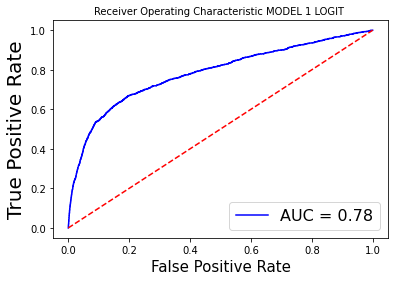

In [ ]:
pred = logit_model2.predict(test_X)
predf2logit = []
for i in pred:
  if i>= 0.3 :
    predf2logit.append(1)
  else:
     predf2logit.append(0)

fig, ax = plt.subplots()
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(test_y, pred)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic MODEL 1 LOGIT ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

In [ ]:
print(metrics.confusion_matrix(test_y, predf2logit))
print("Sensitivity = ", metrics.recall_score(test_y, predf2logit, pos_label=1))
print("Specificity = ", metrics.recall_score(test_y, predf2logit, pos_label=0))
print("Accuracy = ", metrics.accuracy_score(test_y, predf2logit))

[[11419   625]
 [  913   634]]
Sensitivity =  0.40982546864899805
Specificity =  0.9481069412155431
Accuracy =  0.886836877345302


In [ ]:
#X = sm.add_constant(X)
model = Probit(Y, X)
probit_model2 = model.fit()
print(probit_model2.summary())

Optimization terminated successfully.
         Current function value: 0.280971
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                41184
Model:                         Probit   Df Residuals:                    41167
Method:                           MLE   Df Model:                           16
Date:                Mon, 11 Apr 2022   Pseudo R-squ.:                  0.2019
Time:                        20:18:24   Log-Likelihood:                -11572.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0135      0.013      1.024      0.306      -0.012       0.039
job              

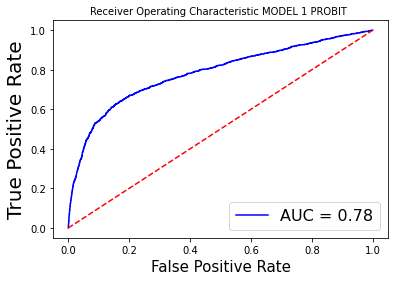

In [ ]:
pred = probit_model2.predict(test_X)
predf2probit = []
for i in pred:
  if i>= 0.3 :
    predf2probit.append(1)
  else:
     predf2probit.append(0)

fig, ax = plt.subplots()
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(test_y, pred)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic MODEL 1 PROBIT ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

In [ ]:
print(metrics.confusion_matrix(test_y, predf2probit))
print("Sensitivity = ", metrics.recall_score(test_y, predf2probit, pos_label=1))
print("Specificity = ", metrics.recall_score(test_y, predf2probit, pos_label=0))
print("Accuracy = ", metrics.accuracy_score(test_y, predf2probit))

[[11411   633]
 [  912   635]]
Sensitivity =  0.41047188106011634
Specificity =  0.947442710063102
Accuracy =  0.8863218306232066


In [ ]:
X = Data.drop(['y',  'poutcome', 'education'], axis = 1)
Y = Data['y']
train_X, test_X = train.drop(['y',  'poutcome', 'education'], axis = 1), test.drop(['y',  'poutcome', 'education'], axis = 1)
train_y, test_y = train['y'], test['y']

In [ ]:
#X = sm.add_constant(X)
model = Logit(Y, X)
logit_model1 = model.fit()
print(logit_model1.summary())

Optimization terminated successfully.
         Current function value: 0.209698
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41184
Model:                          Logit   Df Residuals:                    41166
Method:                           MLE   Df Model:                           17
Date:                Mon, 11 Apr 2022   Pseudo R-squ.:                  0.4044
Time:                        20:20:53   Log-Likelihood:                -8636.2
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0207      0.028      0.726      0.468      -0.035       0.076
job              

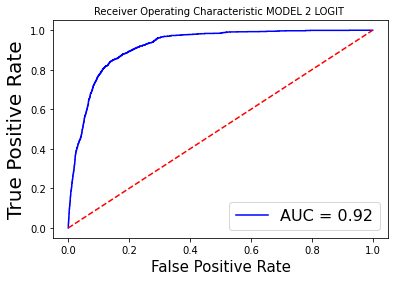

In [ ]:
pred = logit_model1.predict(test_X)
predf1logit = []
for i in pred:
  if i>= 0.3 :
    predf1logit.append(1)
  else:
     predf1logit.append(0)

fig, ax = plt.subplots()
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(test_y, pred)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic MODEL 2 LOGIT ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

In [ ]:
print(metrics.confusion_matrix(test_y, predf1logit))
print("Sensitivity = ", metrics.recall_score(test_y, predf1logit, pos_label=1))
print("Specificity = ", metrics.recall_score(test_y, predf1logit, pos_label=0))
print("Accuracy = ", metrics.accuracy_score(test_y, predf1logit))

[[11255   789]
 [  578   969]]
Sensitivity =  0.6263736263736264
Specificity =  0.9344902025905015
Accuracy =  0.8994187329850637


In [ ]:
#X = sm.add_constant(X)
model = Probit(Y, X)
probit_model1 = model.fit()
print(probit_model1.summary())

Optimization terminated successfully.
         Current function value: 0.207845
         Iterations 8
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                41184
Model:                         Probit   Df Residuals:                    41166
Method:                           MLE   Df Model:                           17
Date:                Mon, 11 Apr 2022   Pseudo R-squ.:                  0.4096
Time:                        20:21:50   Log-Likelihood:                -8559.9
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0136      0.015      0.883      0.377      -0.017       0.044
job              

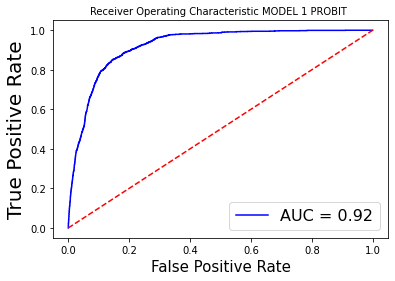

In [ ]:
pred = probit_model1.predict(test_X)
predf1probit = []
for i in pred:
  if i>= 0.3 :
    predf1probit.append(1)
  else:
     predf1probit.append(0)

fig, ax = plt.subplots()
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(test_y, pred)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic MODEL 1 PROBIT ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

In [ ]:
print(metrics.confusion_matrix(test_y, predf1probit))
print("Sensitivity = ", metrics.recall_score(test_y, predf1probit, pos_label=1))
print("Specificity = ", metrics.recall_score(test_y, predf1probit, pos_label=0))
print("Accuracy = ",metrics.accuracy_score(test_y, predf1probit))

[[11272   772]
 [  584   963]]
Sensitivity =  0.6224951519069166
Specificity =  0.9359016937894388
Accuracy =  0.9002280921197852
